In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym

In [2]:
env = gym.make('Blackjack-v1', sab=True)  # https://gymnasium.farama.org/environments/toy_text/blackjack/

pi = np.zeros((10, 10, 2), dtype=int)
Q = np.zeros((10, 10, 2, 2))
N = np.zeros((10, 10, 2, 2))

episodes = 800000
epsilon = 0.1

In [3]:
FIRST_VISIT = True

for episode in range(episodes):
    state, info = env.reset()
    done = False

    SA_pairs = []
    rewards = []

    while state[0] < 12:
        state, reward, done, truncated, info = env.step(1)

    step = 0
    while not done:
        S = (state[0] - 12, state[1] - 1, state[2])
        
        if np.random.rand() < epsilon:
            action = np.random.randint(2)
        else:
            action = pi[S]

        SA_pairs.append((*S, action))
        state, reward, done, truncated, info = env.step(action)
        rewards.append(reward)

        step += 1

    G = 0
    for i in reversed(range(len(SA_pairs))):
        G = G + rewards[i]
        if not FIRST_VISIT or SA_pairs[i] not in SA_pairs[:i]:
            N[SA_pairs[i]] += 1
            Q[SA_pairs[i]] += (G - Q[SA_pairs[i]]) / N[SA_pairs[i]]
            pi[SA_pairs[i][:3]] = np.argmax(Q[SA_pairs[i][:3]])

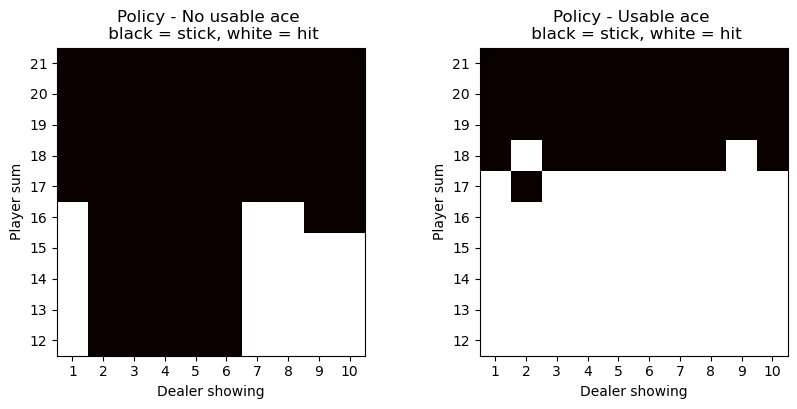

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].imshow(pi[:, :, 0], cmap='hot', interpolation='nearest')
ax[0].set_title('Policy - No usable ace \n black = stick, white = hit')
ax[0].set_xlabel('Dealer showing')
ax[0].set_ylabel('Player sum')
ax[0].set_xticks(range(10))
ax[0].set_xticklabels(range(1, 11))
ax[0].set_yticks(range(10))
ax[0].set_yticklabels(range(12, 22))
ax[0].invert_yaxis()

ax[1].imshow(pi[:, :, 1], cmap='hot', interpolation='nearest')
ax[1].set_title('Policy - Usable ace \n black = stick, white = hit')
ax[1].set_xlabel('Dealer showing')
ax[1].set_ylabel('Player sum')
ax[1].set_xticks(range(10))
ax[1].set_xticklabels(range(1, 11))
ax[1].set_yticks(range(10))
ax[1].set_yticklabels(range(12, 22))
ax[1].invert_yaxis()

plt.show()

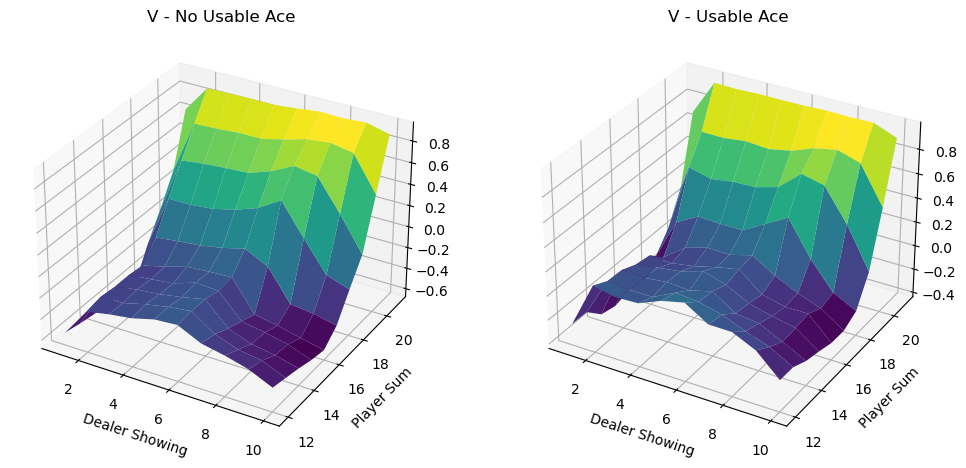

In [5]:
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
x = range(1, 11)
y = range(12, 22)
x, y = np.meshgrid(x, y)

ax[0].plot_surface(x, y, np.max(Q[:, :, 0], axis=2), cmap='viridis')
ax[1].plot_surface(x, y, np.max(Q[:, :, 1], axis=2), cmap='viridis')

ax[0].set_title('V - No Usable Ace')
ax[0].set_xlabel('Dealer Showing')
ax[0].set_ylabel('Player Sum')

ax[1].set_title('V - Usable Ace')
ax[1].set_xlabel('Dealer Showing')
ax[1].set_ylabel('Player Sum')

plt.show()